In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("RdBu", n_colors=8, desat=1.))
sns.set_style("white")
sns.set_style({'grid.color': '0.95'})
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [94]:
NORB = 3
NX = 12
NY = 5
U = 16
BETA = 100
MU = 8

simDir = "../data/real-space/NX" + str(NX) + "-NY" + str(NY) + "/U" + str(U) +\
                 "-BETA" + str(BETA) +\
                 "-MU" + str(MU)

filling = np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[4, 1]
final_gp = np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[5, 1]
it = int(np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[6, 1])
nUp = np.loadtxt(simDir + "/nUp.csv", delimiter = ',')
nDw = np.loadtxt(simDir + "/nDw.csv", delimiter = ',')
grand_potential = np.loadtxt(simDir +"/grand_potential_evol.csv")

In [95]:
it

135

In [96]:
filling

0.59999999999999998

In [97]:
final_gp

-2.3496999999999999

Text(0,0.5,'Grandpotential functional (per site) $[eV]$')

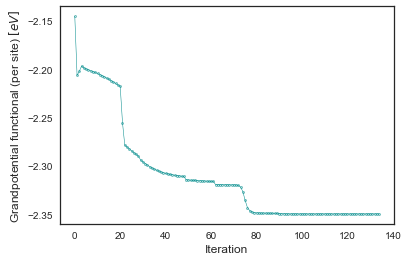

In [98]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(grand_potential[:it],\
        marker = 'o', markersize = 0.5,\
        markeredgewidth = 2, color = 'darkcyan', linewidth = 0.5)
ax.set_xlabel(r'Iteration', fontsize = 12)
ax.set_ylabel(r'Grandpotential functional (per site) $[eV]$',\
fontsize = 12)

[]

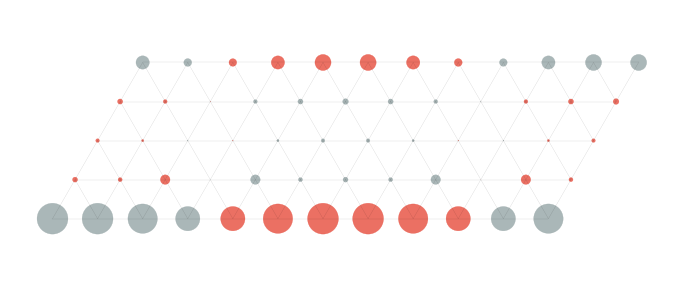

In [99]:
dotscale = 1000

fig = plt.figure(1, figsize = (NX, NY))
ax = fig.add_subplot(111)
for i in range(NX - NY + 1):
    ax.plot([i, ( NY - 1 ) * 0.5 + i],\
    [0, ( NY - 1 ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NY - 1 + i , ( NY - 1 ) * 0.5 + i],\
    [0, ( NY - 1 ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
for i in range(1, NY - 1):
    ax.plot([NY - 1 - i , ( NY - 1 - i ) * 0.5],\
    [0, ( NY - 1 - i ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NX - 1 + 0.5 + 0.5 * i,\
    NX - 0.5 * (NY - 1) + i],\
    [np.sqrt(3) / 2 * (1 + i), np.sqrt(3) / 2 * (NY - 1)],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([i + NX - NY + 1,\
    ( NY - 1 ) * 0.5 + i + NX - NY + 1],\
    [0, ( NY - 1 ) * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
    ax.plot([NX - 1 + i / 2, i / 2],\
    [i * np.sqrt(3) / 2, i * np.sqrt(3) / 2],\
    linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - 1 + 0.5, NX - 0.5 * (NY - 1)],\
[np.sqrt(3) / 2, np.sqrt(3) / 2 * (NY - 1)],\
linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - NY + 1,\
( NY - 1 ) * 0.5 + NX - NY + 1],\
[0, ( NY - 1 ) * np.sqrt(3) / 2],\
linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - 1, 0], [0, 0],\
        linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)
ax.plot([NX - 1 + (NY - 1) / 2, ( NY - 1 ) / 2],\
[( NY - 1 ) * np.sqrt(3) / 2, ( NY - 1 ) * np.sqrt(3) / 2],\
linewidth = 0.3, color = 'k', linestyle = '-', alpha = 0.2)

Sz = np.zeros(NX * NY)
for i in range(NX * NY):
    Sz[i] = nUp[NORB * i] + nUp[NORB * i + 1]\
    + nUp[NORB * i + 2]\
    - ( nDw[NORB * i] + nDw[NORB * i + 1]\
    + nDw[NORB * i + 2] )
clr = np.chararray((NX * NY), itemsize = 10)
a1 = np.arange(NX)
a2 = np.arange(NY)
vs = np.zeros((NX * NY , 2))
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(NX):
    for j in range(NY):
            vs[NX * j + i, :] =\
            a1[i] * v1 + a2[j] * v2
            if Sz[NX * j + i] < 0 :
                clr[NX * j + i] = "#95a5a6"
            else:
                clr[NX * j + i] = "#e74c3c"

ax.axis('off')
ax.scatter(vs[:, 0], vs[:, 1],\
s = dotscale * abs(Sz),\
c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
ax.axis('equal')
ax.set_yticklabels([])
ax.set_xticklabels([])